In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
file_path = 'weather.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m', errors='coerce')
df = df.dropna()
df = df.astype({'Value': 'float64', 'Anomaly': 'float64'})
df['Year'] = df['Date'].dt.year
df_filtered = df[(df['Year'] >= 1895) & (df['Year'] <= 2020)]
X = df_filtered[['Year']].values
y = df_filtered['Value'].values
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_

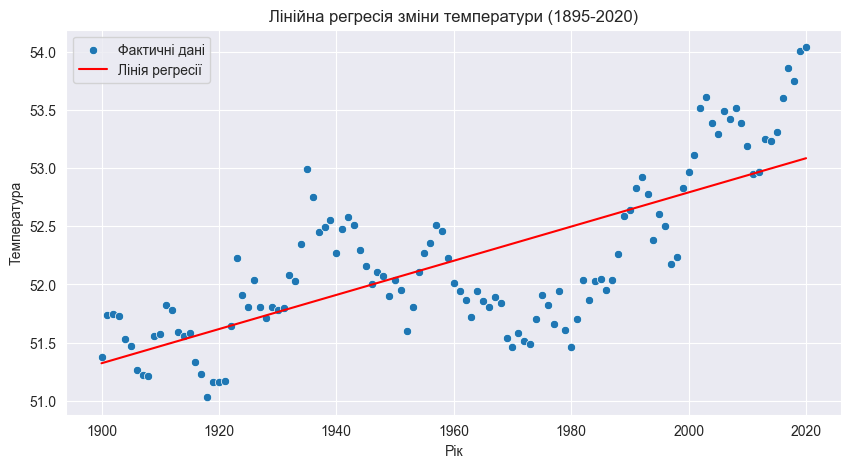

In [18]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_filtered['Year'], y=df_filtered['Value'], label='Фактичні дані')
plt.plot(df_filtered['Year'], model.predict(X), color='red', label='Лінія регресії')
plt.xlabel('Рік')
plt.ylabel('Температура')
plt.title('Лінійна регресія зміни температури (1895-2020)')
plt.legend()
plt.show()

In [4]:
years = np.array([[2021], [2022], [2023], [2024]])
predicted_values = model.predict(years)

In [5]:
for year, temp in zip(years.flatten(), predicted_values):
    print(f'Прогнозована температура у {year} році: {temp:.2f}')


Прогнозована температура у 2021 році: 53.10
Прогнозована температура у 2022 році: 53.11
Прогнозована температура у 2023 році: 53.13
Прогнозована температура у 2024 році: 53.14


In [6]:
years_past = np.array([[1890], [1891], [1892], [1893], [1894]])
predicted_values_past = model.predict(years_past)

In [7]:
for year, temp in zip(years_past.flatten(), predicted_values_past):
    print(f'Оцінена температура у {year} році: {temp:.2f}')

Оцінена температура у 1890 році: 51.18
Оцінена температура у 1891 році: 51.19
Оцінена температура у 1892 році: 51.20
Оцінена температура у 1893 році: 51.22
Оцінена температура у 1894 році: 51.23


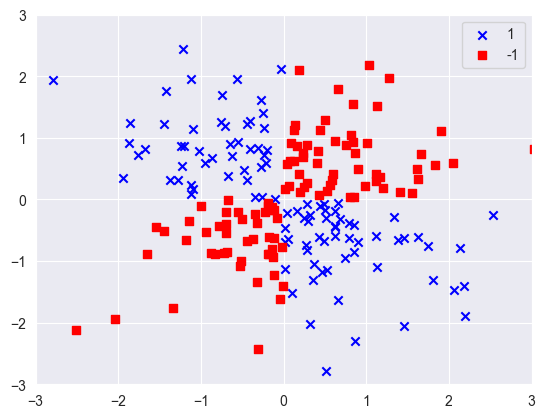

In [8]:
np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1],
            c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

C:\Users\mmm22\AppData\Local\Temp\ipykernel_16560\2303810590.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


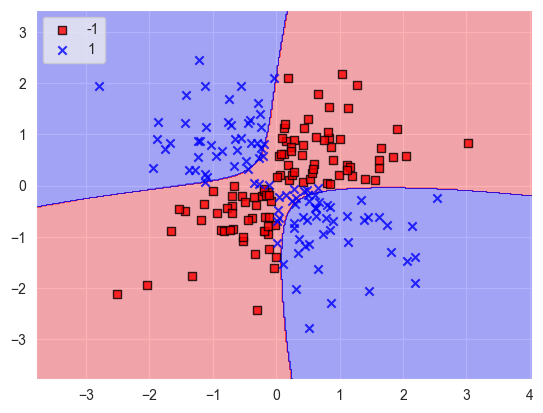

In [11]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v') 
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max()) 
    plt.ylim(xx2.min(), xx2.max()) 

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1], 
                    alpha=0.8,
                    c=[colors[idx]], 
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Zestaw testowy') 

svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

In [12]:
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "SVC (RBF Kernel)": SVC(kernel='rbf', gamma='scale'),
    "GaussianNB": GaussianNB()
}

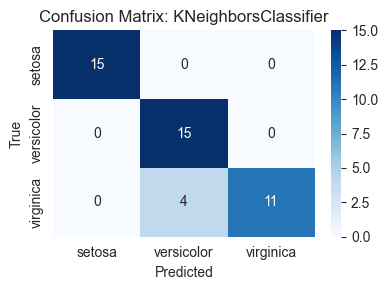

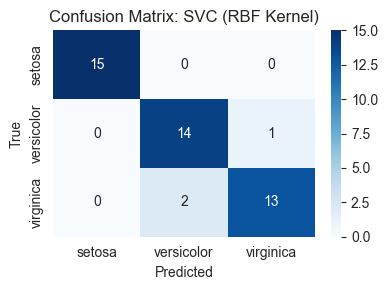

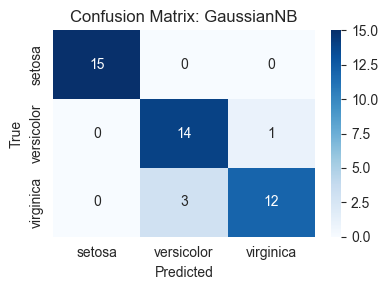

In [13]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()